In [35]:
import torch
from torch import nn
import numpy as np
from tqdm import tqdm
import os 

os.chdir('/home/tristan/loss-subspace-geometry-project/loss-subspace-geometry/src')


from models.mlp import SubspaceNN, NN, NonLinearSubspaceNN
from models.subspace_layers import LinesNN

In [36]:
import torchvision
import torchvision.transforms as transforms

In [50]:
# configs
data_dim = 784
hidden_size = 512
out_dim = 10
dropout_prob = 0.3
seed = 1256
train_beta = 0.5
vanilla_seed = 450
# device = torch.device('cuda')
device = torch.device('cuda:2')
activation = 'tanh'

model_path = f'/home/tristan/loss-subspace-geometry-project/loss-subspace-geometry-save/models/nonlinear_subspace_vanilla_mlp_seed_{seed}_beta_{train_beta}_{activation}_0.pt'

curve_model = NonLinearSubspaceNN(input_dim=data_dim, 
                         hidden_dim=hidden_size, 
                         out_dim=out_dim, 
                         dropout_prob=dropout_prob, 
                         seed=seed).to(device)

for tuple in curve_model.state_dict():
    print(tuple)

checkpoint = torch.load(model_path)
for tuple in checkpoint:
    print(tuple)
curve_model.load_state_dict(checkpoint, strict=True)

mlp.linear.weight
mlp.linear.bias
mlp.linear.line.parameterization_linear_1.weight
mlp.linear.line.parameterization_linear_1.bias
mlp.linear.line.parameterization_linear_2.weight
mlp.linear.line.parameterization_linear_2.bias
mlp.linear.line.parameterization_linear_3.weight
mlp.linear.line.parameterization_linear_3.bias
mlp.linear.line.parameterization_linear_4.weight
mlp.linear.line.parameterization_linear_4.bias
out.weight
out.bias
out.line.parameterization_linear_1.weight
out.line.parameterization_linear_1.bias
out.line.parameterization_linear_2.weight
out.line.parameterization_linear_2.bias
out.line.parameterization_linear_3.weight
out.line.parameterization_linear_3.bias
out.line.parameterization_linear_4.weight
out.line.parameterization_linear_4.bias
mlp.linear.weight
mlp.linear.bias
mlp.linear.line.parameterization_linear_1.weight
mlp.linear.line.parameterization_linear_1.bias
mlp.linear.line.parameterization_linear_2.weight
mlp.linear.line.parameterization_linear_2.bias
mlp.line

<All keys matched successfully>

In [51]:
# more configs

grid_points = 15
margin_left = 0.2
margin_right = 0.2
margin_bottom = 0.2
margin_top = 0.2

In [52]:
curve_model

NonLinearSubspaceNN(
  (mlp): NonLinearSubspaceMLP(
    (linear): LinesNN(
      in_features=784, out_features=512, bias=True
      (line): ParameterizedSubspace(
        (parameterization_linear_1): Linear(in_features=1, out_features=10, bias=True)
        (parameterization_linear_2): Linear(in_features=10, out_features=20, bias=True)
        (parameterization_linear_3): Linear(in_features=20, out_features=40, bias=True)
        (parameterization_linear_4): Linear(in_features=40, out_features=401408, bias=True)
      )
    )
    (dropout): Dropout(p=0.3, inplace=False)
  )
  (out): LinesNN(
    in_features=512, out_features=10, bias=True
    (line): ParameterizedSubspace(
      (parameterization_linear_1): Linear(in_features=1, out_features=10, bias=True)
      (parameterization_linear_2): Linear(in_features=10, out_features=20, bias=True)
      (parameterization_linear_3): Linear(in_features=20, out_features=40, bias=True)
      (parameterization_linear_4): Linear(in_features=40, out

In [53]:
if activation == 'relu':
    curve_parameters = list(curve_model.parameters())
    for (i,(name, param)) in enumerate(curve_model.named_parameters()):
        print(f"{i}: {name}:")
    w = []

    # actual neural net
    w.append(np.concatenate([
            # weights layer 1, biases layer 1, weights layer 2, biases layer 2
            p.data.cpu().numpy().ravel() for p in [curve_parameters[0], curve_parameters[1], curve_parameters[6], curve_parameters[7]]
        ]))

    # subspace network 1 parameters
    w.append(np.concatenate([
            # weights layer 1, biases layer 1, weights layer 2, biases layer 2
            p.data.cpu().numpy().ravel() for p in [curve_parameters[2], curve_parameters[3], curve_parameters[4], curve_parameters[5]]
        ]))

    # subspace network 2 parameters
    w.append(np.concatenate([
            # weights layer 1, biases layer 1, weights layer 2, biases layer 2
            p.data.cpu().numpy().ravel() for p in [curve_parameters[8], curve_parameters[9], curve_parameters[10], curve_parameters[11]]
    ]))

In [54]:
if activation == 'tanh':
    curve_parameters = list(curve_model.parameters())
    for (i,(name, param)) in enumerate(curve_model.named_parameters()):
        print(f"{i}: {name}:")
    w = []

    # actual neural net
    w.append(np.concatenate([
            # weights layer 1, biases layer 1, weights layer 2, biases layer 2
            p.data.cpu().numpy().ravel() for p in [curve_parameters[0], curve_parameters[1], curve_parameters[10], curve_parameters[11]]
        ]))

    # subspace network 1 parameters
    w.append(np.concatenate([
            # weights layer 1, biases layer 1, weights layer 2, biases layer 2
            p.data.cpu().numpy().ravel() for p in curve_parameters[2:10]
        ]))

    # subspace network 2 parameters
    w.append(np.concatenate([
            # weights layer 1, biases layer 1, weights layer 2, biases layer 2
            p.data.cpu().numpy().ravel() for p in curve_parameters[12:20]
    ]))

0: mlp.linear.weight:
1: mlp.linear.bias:
2: mlp.linear.line.parameterization_linear_1.weight:
3: mlp.linear.line.parameterization_linear_1.bias:
4: mlp.linear.line.parameterization_linear_2.weight:
5: mlp.linear.line.parameterization_linear_2.bias:
6: mlp.linear.line.parameterization_linear_3.weight:
7: mlp.linear.line.parameterization_linear_3.bias:
8: mlp.linear.line.parameterization_linear_4.weight:
9: mlp.linear.line.parameterization_linear_4.bias:
10: out.weight:
11: out.bias:
12: out.line.parameterization_linear_1.weight:
13: out.line.parameterization_linear_1.bias:
14: out.line.parameterization_linear_2.weight:
15: out.line.parameterization_linear_2.bias:
16: out.line.parameterization_linear_3.weight:
17: out.line.parameterization_linear_3.bias:
18: out.line.parameterization_linear_4.weight:
19: out.line.parameterization_linear_4.bias:


In [55]:
def sample_subspace_relu(alpha, subspace_net_1, subspace_net_2):
    alpha = torch.tensor([float(alpha)])
    setattr(subspace_net_1, 'alpha', alpha)
    setattr(subspace_net_2, 'alpha', alpha)
    w1 = subspace_net_1.get_weight().clone().detach()
    b1 = curve_parameters[1].clone().detach().cpu()
    w2 = subspace_net_2.get_weight().clone().detach()
    b2 = curve_parameters[7].clone().detach().cpu()
    weights = torch.cat([w1,b1,w2,b2]).numpy()
    return weights

def sample_subspace_tanh(alpha, subspace_net_1, subspace_net_2):
    alpha = torch.tensor([float(alpha)])
    setattr(subspace_net_1, 'alpha', alpha)
    setattr(subspace_net_2, 'alpha', alpha)
    w1 = subspace_net_1.get_weight().clone().detach()
    b1 = curve_parameters[1].clone().detach().cpu()
    w2 = subspace_net_2.get_weight().clone().detach()
    b2 = curve_parameters[11].clone().detach().cpu()
    weights = torch.cat([w1,b1,w2,b2]).numpy()
    return weights

In [66]:
## Sample uniformly from subspace ##
samples = 500
alphas = np.linspace(0, 1, samples)

# instantiate both subspace networks
subspace_net_1 = LinesNN(
    in_features=data_dim,
    out_features=hidden_size
)

subspace_net_2 = LinesNN(
    in_features=hidden_size,
    out_features=out_dim
)

if activation == "tanh":
    # set subspace network weights
    sample_subspace = sample_subspace_tanh
    with torch.no_grad():
        subspace_net_1.line.parameterization_linear_1.weight.copy_(curve_parameters[2])
        subspace_net_1.line.parameterization_linear_1.bias.copy_(curve_parameters[3])
        subspace_net_1.line.parameterization_linear_2.weight.copy_(curve_parameters[4])
        subspace_net_1.line.parameterization_linear_2.bias.copy_(curve_parameters[5])
        subspace_net_1.line.parameterization_linear_3.weight.copy_(curve_parameters[6])
        subspace_net_1.line.parameterization_linear_3.bias.copy_(curve_parameters[7])
        subspace_net_1.line.parameterization_linear_4.weight.copy_(curve_parameters[8])
        subspace_net_1.line.parameterization_linear_4.bias.copy_(curve_parameters[9])

        subspace_net_2.line.parameterization_linear_1.weight.copy_(curve_parameters[12])
        subspace_net_2.line.parameterization_linear_1.bias.copy_(curve_parameters[13])
        subspace_net_2.line.parameterization_linear_2.weight.copy_(curve_parameters[14])
        subspace_net_2.line.parameterization_linear_2.bias.copy_(curve_parameters[15])
        subspace_net_2.line.parameterization_linear_3.weight.copy_(curve_parameters[16])
        subspace_net_2.line.parameterization_linear_3.bias.copy_(curve_parameters[17])
        subspace_net_2.line.parameterization_linear_4.weight.copy_(curve_parameters[18])
        subspace_net_2.line.parameterization_linear_4.bias.copy_(curve_parameters[19])

if activation == "relu":
    sample_subspace = sample_subspace_relu
    # set subspace network weights
    with torch.no_grad():
        subspace_net_1.line.parameterization_linear_1.weight.copy_(curve_parameters[2])
        subspace_net_1.line.parameterization_linear_1.bias.copy_(curve_parameters[3])
        subspace_net_1.line.parameterization_linear_2.weight.copy_(curve_parameters[4])
        subspace_net_1.line.parameterization_linear_2.bias.copy_(curve_parameters[5])

        subspace_net_2.line.parameterization_linear_1.weight.copy_(curve_parameters[8])
        subspace_net_2.line.parameterization_linear_1.bias.copy_(curve_parameters[9])
        subspace_net_2.line.parameterization_linear_2.weight.copy_(curve_parameters[10])
        subspace_net_2.line.parameterization_linear_2.bias.copy_(curve_parameters[11])

# sample points in weight space

subspace_endpoint_0 = sample_subspace(0, subspace_net_1, subspace_net_2)
subspace_endpoint_1 = sample_subspace(1, subspace_net_1, subspace_net_2)

weight_subspace_points = []
weight_interpolated_points = []
for alpha in alphas:
    weights = sample_subspace(alpha, subspace_net_1, subspace_net_2)
    weight_subspace_points.append(weights)
    interpolated_weights = alpha*subspace_endpoint_1 + (1-alpha)*subspace_endpoint_0
    weight_interpolated_points.append(interpolated_weights)

weight_subspace_points = np.array(weight_subspace_points)
weight_interpolated_points = np.array(weight_interpolated_points)


In [67]:
def get_weights(model: nn.Module, t):
    weights = []
    for name, module in model.named_modules():
        if isinstance(module, nn.Linear) and 'parameterization' not in name:
            # add attribute for weight dimensionality and subspace dimensionality
            setattr(module, f'alpha', torch.tensor([t], dtype=torch.float32, device=device))
            print(module.get_weight())
            weights.extend([module.get_weight(), module.bias.data])
        # weights.extend([w for w in module.compute_weights_t(coeffs_t) if w is not None])
    return np.concatenate([w.detach().cpu().numpy().ravel() for w in weights])


In [68]:
# even more configs for evaluating on FashionMNIST
data_dir = '/home/tristan/loss-subspace-geometry-project/data/'
batch_size = 128

In [69]:
transform = transforms.Compose([transforms.ToTensor()])
FashionMNIST_data_train = torchvision.datasets.FashionMNIST(
    data_dir, train=True, transform=transform, download=False)

train_set, val_set = torch.utils.data.random_split(
    FashionMNIST_data_train, [50000, 10000])
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(
    val_set, batch_size=len(val_set), shuffle=False)

In [70]:
criterion = nn.CrossEntropyLoss(reduction='sum')

In [71]:
def eval(model: nn.Module, loader):
    running_loss = 0.0
    num_right = 0

    model.eval()

    for i, (x, y) in enumerate(loader):
            reshaped_x = x.reshape(x.size(0), 784)
            y_hat = model(reshaped_x.to(device))
            num_right += torch.sum(
                y.to(device) == torch.argmax(
                    y_hat, dim=-1)).detach().cpu().item()

            running_loss += criterion(y_hat, y.to(device)).item()
    return {
        'nll': running_loss / len(loader.dataset),
        'loss': running_loss / len(loader.dataset),
        'accuracy': num_right * 100.0 / len(loader.dataset),
    }

In [72]:
base_model =  NN(input_dim=data_dim, 
                         hidden_dim=hidden_size, 
                         out_dim=out_dim, 
                         dropout_prob=dropout_prob).to(device)

subspace_test_acc = np.zeros(len(alphas))
subspace_train_acc = np.zeros(len(alphas))
interpolate_test_acc = np.zeros(len(alphas))
interpolate_train_acc = np.zeros(len(alphas))

for i in tqdm(range(len(alphas))):
    weight_subspace = weight_subspace_points[i,:]
    offset = 0
    for parameter in base_model.parameters():
        size = np.prod(parameter.size())
        value = weight_subspace[offset:offset+size].reshape(parameter.size())
        parameter.data.copy_(torch.from_numpy(value)).to(device)
        offset += size
    te_res = eval(model=base_model, loader=valid_loader)
    tr_res = eval(model=base_model, loader=train_loader)
    subspace_test_acc[i] = te_res['accuracy']
    subspace_train_acc[i] = tr_res['accuracy']

for i in tqdm(range(len(alphas))):
    weight_interpolated = weight_interpolated_points[i,:]
    offset = 0
    for parameter in base_model.parameters():
        size = np.prod(parameter.size())
        value = weight_interpolated[offset:offset+size].reshape(parameter.size())
        parameter.data.copy_(torch.from_numpy(value)).to(device)
        offset += size
    te_res = eval(model=base_model, loader=valid_loader)
    tr_res = eval(model=base_model, loader=train_loader)
    interpolate_test_acc[i] = te_res['accuracy']
    interpolate_train_acc[i] = tr_res['accuracy']


100%|██████████| 500/500 [29:57<00:00,  3.60s/it]


In [73]:
print(f"[subspace] average test accuracy: {np.mean(subspace_test_acc)}")
print(f"[interpolate] average test accuracy: {np.mean(interpolate_test_acc)}")

print(f"[subspace] average train accuracy: {np.mean(subspace_train_acc)}")
print(f"[interpolate] average train accuracy: {np.mean(interpolate_train_acc)}")

[subspace] average test accuracy: 92.45720000000001
[interpolate] average test accuracy: 92.46904
[subspace] average train accuracy: 92.568756
[interpolate] average train accuracy: 92.567644


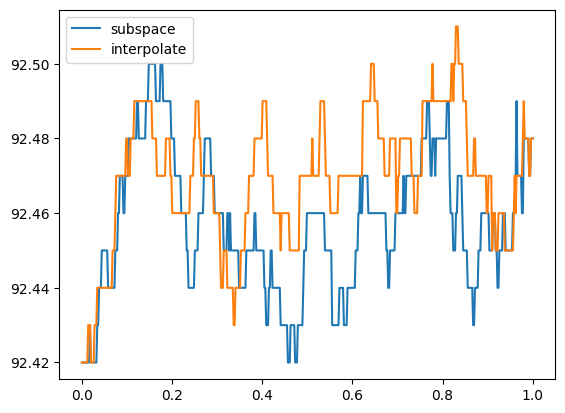

In [74]:
import matplotlib.pyplot as plt


plt.plot(alphas, subspace_test_acc, label="subspace")
plt.plot(alphas, interpolate_test_acc, label="interpolate")
plt.legend()
plt.show()

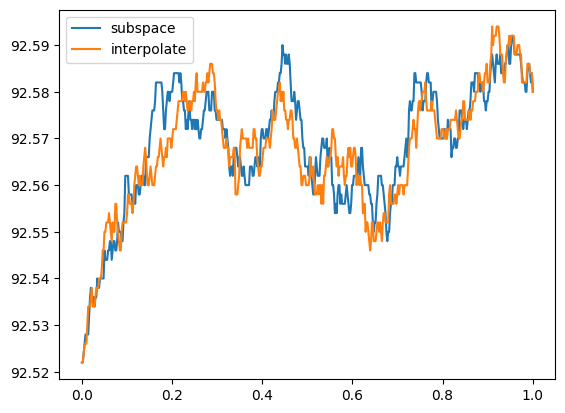

In [75]:
import matplotlib.pyplot as plt


plt.plot(alphas, subspace_train_acc, label="subspace")
plt.plot(alphas, interpolate_train_acc, label="interpolate")
plt.legend()
plt.show()